Enter your Starting Node:  7
Enter your Destination Node:  20


Shortest path from 7 to 20: 7 -> 10 -> 21 -> 19 -> 20
Total cost of the path: 512.48
Elapsed time:  0.001165151596069336


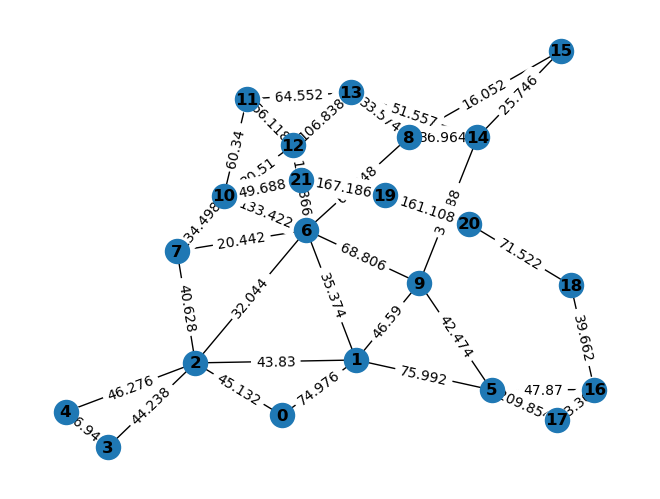

In [2]:
import sys
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

def heuristic(node, end):
    # Implement your heuristic function here
    # For this example, we'll use the number of characters in common as the heuristic
    return -int(node == end)
def greedy_bfs(graph, start, end):
    frontier = deque([(start, [start], 0)])  # Queue of (node, path, cost)
    explored = set()

    while frontier:
        node, path, cost = frontier.popleft()
        explored.add(node)

        if node == end:
            return path, cost

        for neighbor in graph[node]:
            if neighbor not in explored:
                new_path = path + [neighbor]
                #print(graph[node][neighbor]['weight'])
                new_cost = cost + graph[node][neighbor]['weight']
                frontier.append((neighbor, new_path, new_cost))
                #print(frontier)

        # Sort the frontier based on the heuristic function
        frontier = deque(sorted(frontier, key=lambda x: heuristic(x[0], end)))
        #print(frontier)
    return [], 0  # No path found

# Specify the path to your Excel file
excel_file_path = 'C:\\Users\\Admin\\Documents\\Coding Portfolio\\Python\\Codes_and_Data_Thesis_2\\Codes_and_Data_Thesis_2\\Time_Matrix.xlsx'

# Read the Excel file into a pandas DataFrame without header
df = pd.read_excel(excel_file_path,sheet_name='Sheet1', header=None)

# Remove the header and frame
df = df.iloc[0:, :].reset_index(drop=True)

# Convert the DataFrame to the adjacency matrix
adjacency_matrix = df.values

# Constructing th graph in Excel
G = nx.Graph()
for i in range(len(adjacency_matrix)):
    for j in range(i+1, len(adjacency_matrix)):
        if adjacency_matrix[i][j] > 0:
            G.add_edge(i, j, weight=adjacency_matrix[i][j])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

start_node = int(input("Enter your Starting Node: "))
end_node = int(input("Enter your Destination Node: "))

# Find the shortest path and total cost
start_time = time.time()
shortest_path, total_cost = greedy_bfs(G, start_node, end_node)

# Highlight the shortest path if found
if shortest_path:
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    #print(path_edges)
    """nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='r')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)"""
    print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(map(str, shortest_path))}")
    print(f"Total cost of the path: {total_cost}")
else:
    print(f"No path found from {start_node} to {end_node}")

#plt.axis('off')
#plt.show()

end_time = time.time()
final_time = end_time - start_time

print("Elapsed time: ", final_time)